In [149]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gold-price-data/gld_price_data.csv


In [150]:
#import all needed library
import pandas as pd
import seaborn as sns
from pandas_profiling import ProfileReport
from sklearn.ensemble import ExtraTreesRegressor , RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split , KFold , cross_val_score

In [151]:
url = '../input/gold-price-data/gld_price_data.csv'

In [152]:
df = pd.read_csv(url)

In [153]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [154]:
#remove unnecessary column
df.drop('Date' , axis = 1 , inplace = True)

In [155]:
df.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      2290 non-null   float64
 1   GLD      2290 non-null   float64
 2   USO      2290 non-null   float64
 3   SLV      2290 non-null   float64
 4   EUR/USD  2290 non-null   float64
dtypes: float64(5)
memory usage: 89.6 KB


In [157]:
df.isnull().sum()

SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [158]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [159]:
sns.set()

In [160]:
df.shape

(2290, 5)

In [161]:
df.columns

Index(['SPX', 'GLD', 'USO', 'SLV', 'EUR/USD'], dtype='object')

In [162]:
df.nunique()

SPX        2277
GLD        1930
USO        1514
SLV        1331
EUR/USD    2066
dtype: int64

In [163]:
df.duplicated().sum()

0

# **visualisation**

<Axes: xlabel='SPX', ylabel='Count'>

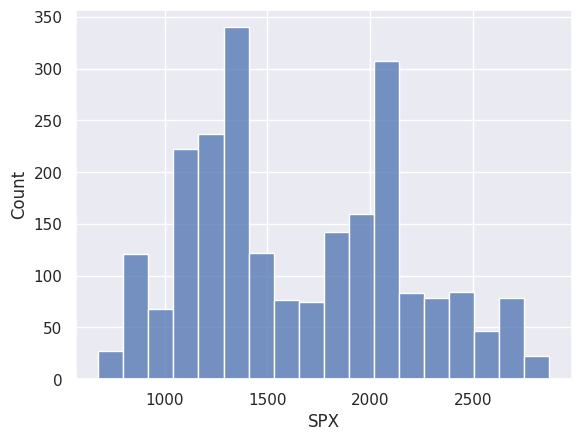

In [164]:
sns.histplot(data = df , x = df.SPX )

<Axes: >

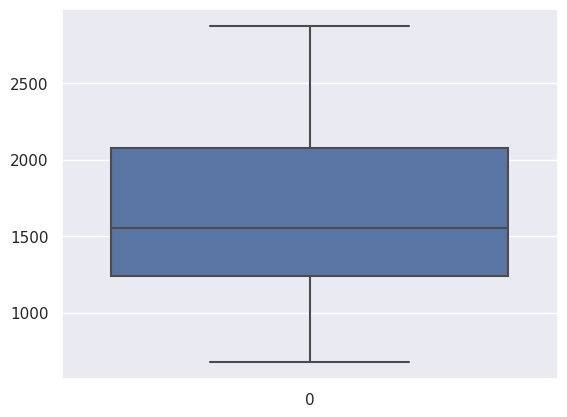

In [165]:
sns.boxplot(df.SPX)

<Axes: xlabel='GLD', ylabel='Count'>

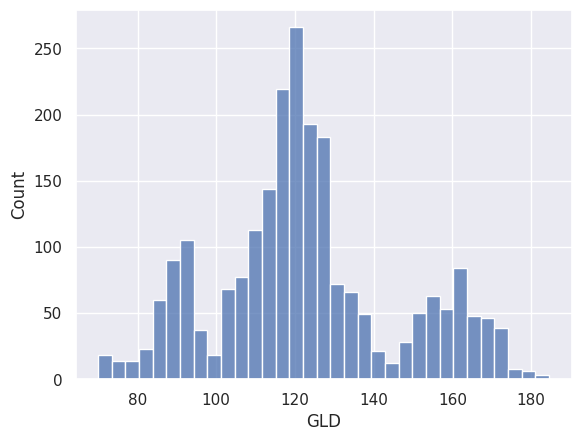

In [166]:
sns.histplot(data = df , x = df.GLD )

<Axes: >

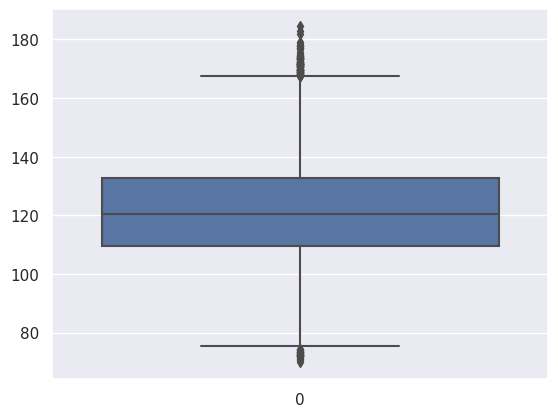

In [167]:
sns.boxplot(df.GLD)

<Axes: xlabel='USO', ylabel='Count'>

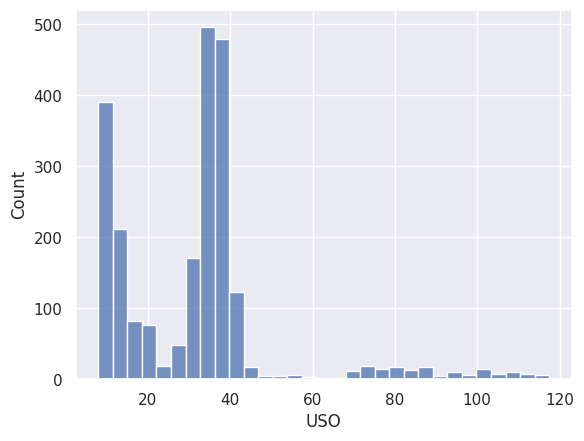

In [168]:
sns.histplot(df.USO)

<Axes: >

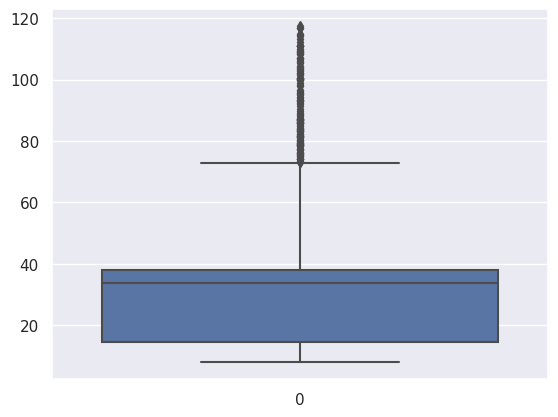

In [169]:
sns.boxplot(df.USO)

In [170]:
ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

# Set up best model for prediction

In [171]:
etr = ExtraTreesRegressor(n_estimators=100,  random_state=100) 
rf = RandomForestRegressor(n_estimators=100 , random_state=100)


# Separated dependence(target) and Independence variable

In [172]:
X = df.drop('GLD',axis=1)
y = df.GLD

In [173]:
x=X

In [174]:
xtrain , xtest , ytrain , ytest = train_test_split(x,y , test_size = .20 , random_state=100)  

In [175]:
etr.fit(xtrain , ytrain )

ExtraTreesRegressor(random_state=100)

In [176]:
etr.score(xtrain , ytrain)

0.9999999999960099

In [177]:
etr.score(xtest , ytest)

0.9937984378981959

In [178]:
cv = KFold(n_splits=5 , random_state=100 , shuffle=True)

In [179]:
#for RandomForestRegressor

cross_val_score(estimator=rf ,X=X , y = y ,cv = cv)

array([0.9871772 , 0.99171973, 0.99315905, 0.99196596, 0.98272936])

In [180]:
# for ExtraTreesRegressor
cross_val_score(estimator=etr ,X=X , y = y ,cv = cv)

array([0.99362622, 0.99529231, 0.99417702, 0.99549482, 0.98782551])

In [181]:
y_predict = etr.predict(xtest)

In [182]:
y_predict

array([154.83630125,  92.37149917, 161.3299005 , 165.81790103,
       120.32840047, 117.1489007 , 135.28189701, 157.25850127,
       171.40480232, 148.71169935, 165.75560302, 129.58660051,
       155.71230266, 113.40529969, 146.25890117, 114.09909862,
       118.7696984 , 170.34369802,  81.25399965, 113.69799945,
       158.54879872, 127.06329933, 154.85270274, 127.18469805,
       118.42949982,  90.82909969, 124.53309976, 124.2647366 ,
       114.92390112, 123.74959952, 116.29880057, 167.33009892,
        86.98809813, 151.14849712, 148.50680081, 120.2911997 ,
       168.00819874, 119.60780128, 120.25719976, 124.22409996,
       120.30640073, 118.1859003 , 110.03929787, 152.76650097,
       152.69400093, 110.13189857,  93.86420043,  94.99580056,
        72.89970028, 111.76530051, 135.49499717, 130.81439883,
       168.97359834, 115.59880071, 124.97850109,  90.60039955,
       153.14079941, 123.96190067,  92.37699974, 126.27739776,
       118.12830051, 127.19219893,  74.99210088, 146.92